<a href="https://colab.research.google.com/github/sriram2098/Hubblemind_ML_Intern_project/blob/main/Hubblemind_Internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

###In this project, I worked on predicting Amazon's stock price and trading volumes using the machine learning process. Starting with Exploratory Data Analysis (EDA), I explored trends and patterns in historical stock data. Following this, I developed predictive models using machinelearning algorithms. The entire process, from data analysis to model development and evaluation, was thoroughly documented to ensure transparency and reproducibility. This project showcases the application of machine learning in financial forecasting for better investment decisions.

In [3]:
#This project using Python 3 enviroment for installed Libraries and best analatical experience.
#we have to load some packages to load.

#linear algebra
import numpy as np

#data processing and read data
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

#Week 1: Data Exploration and Data Preprocessing

##Task 1: Import and Understand Data

  1. Load the dataset.
  2. Display the first few rows to understand its structure.
  3. Check data types, missing values and basic statics.

##Load the Dataset

In [6]:
import pandas as pd

#load the dataset
stock_path = '/content/Stock Market Dataset.csv'
data = pd.read_csv(stock_path)

#Display the first few rows to understand its structure
data.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


##Code Explanation:

###The dataset is loaded into a Data Frame and first few rows are displayed to underdstand the structure and content of the data.

##Why it's Important:

###Understanding the structure of the data is the first step in any data analysis or machine learning project. It allows you to familarize yourself with the type of variables, their format and overall organization of the data.

###Displaying first few rows for understand its structure.

In [8]:
#Check data typre in a row
print(data.dtypes)

Unnamed: 0             int64
Date                  object
Natural_Gas_Price    float64
Natural_Gas_Vol.     float64
Crude_oil_Price      float64
Crude_oil_Vol.       float64
Copper_Price         float64
Copper_Vol.          float64
Bitcoin_Price         object
Bitcoin_Vol.         float64
Platinum_Price        object
Platinum_Vol.        float64
Ethereum_Price        object
Ethereum_Vol.        float64
S&P_500_Price         object
Nasdaq_100_Price      object
Nasdaq_100_Vol.      float64
Apple_Price          float64
Apple_Vol.           float64
Tesla_Price          float64
Tesla_Vol.           float64
Microsoft_Price      float64
Microsoft_Vol.       float64
Silver_Price         float64
Silver_Vol.          float64
Google_Price         float64
Google_Vol.          float64
Nvidia_Price         float64
Nvidia_Vol.          float64
Berkshire_Price       object
Berkshire_Vol.       float64
Netflix_Price        float64
Netflix_Vol.         float64
Amazon_Price         float64
Amazon_Vol.   

**Data Types:** Checking the data typs helps us ensure that all columns are in the appropriate format for further processing.

In [ ]:
#Checking for missing values
print(data.isnull().sum())

Unnamed: 0             0
Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        607
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           47
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
dtype: int64


**Missing Values: ** Identifying missing values early on allow us to handle them before model development.

In [ ]:
#Display basic statistics
print(data.describe())

        Unnamed: 0  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
count  1243.000000        1243.000000       1239.000000      1243.000000   
mean    621.000000           3.494714     131624.116223        67.577064   
std     358.967501           1.822540      64385.141749        20.465500   
min       0.000000           1.482000       1200.000000       -37.630000   
25%     310.500000           2.347500      91900.000000        55.095000   
50%     621.000000           2.702000     127370.000000        69.230000   
75%     931.500000           4.055500     169460.000000        80.455000   
max    1242.000000           9.647000     381970.000000       123.700000   

       Crude_oil_Vol.  Copper_Price    Copper_Vol.  Bitcoin_Vol.  \
count    1.220000e+03   1243.000000    1206.000000  1.243000e+03   
mean     3.989038e+05      3.541957   35406.616915  4.033918e+07   
std      2.161619e+05      0.702819   38415.448731  2.940889e+08   
min      1.702000e+04      2.100500      10

**Basic Statistics:** This gives us an overview of the data distribution, including mean, standard diviation and range of numeric columns.

## Code Explanation:

  ###The code checks the data types of each column, identifies missing values and computes basic statistical summeries(like mean, median and standard deviation) for numerical columns.

##Why it's Important:

  ###Knowing the data types is crucial for choosing the right preprocessing methods and models. Identifying missing values early on allows you to address them before they cause issues in model training. Basic statistics provide a quick overview of the data’s distribution and potential outliers.

## Task 2: Exploratory Data Analysis (EDA)
* Visualise the distribution of the target variable (Amazon_Price).
* Analyse relationships between Amazon_Price and other features using
* scatter plots.
* Compute and visualise the correlation matrix.

##Visualize the distribution of the target variable(Amazon_Price).

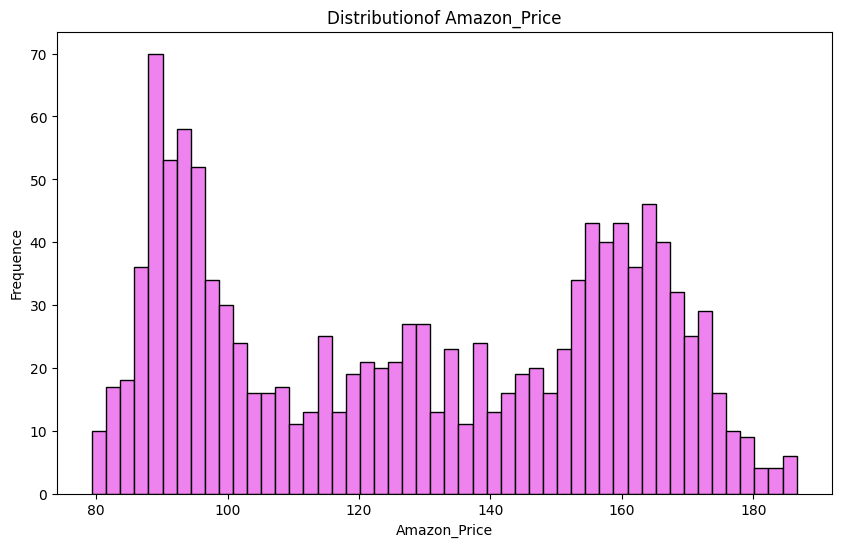

In [12]:
import matplotlib.pyplot as plt


#Convert Amazon price to numeric handling commas
data['Amazon_Price'] = data['Amazon_Price'].astype(str).str.replace(',','').astype(float)

#Plot the distribution of Amazon_Price
plt.figure(figsize=(10,6))
plt.hist(data['Amazon_Price'].dropna(), bins = 50, color = 'violet', edgecolor = 'black')
plt.title('Distributionof Amazon_Price')
plt.xlabel('Amazon_Price')
plt.ylabel('Frequence')
plt.show()

### Code Explanation:

The Amazon_Price column is converted to numeric format (if necessary), and a histogram is plotted to visualize its distribution.

### Why It’s Important:

Visualizing the distribution of the target variable helps you understand its spread, identify any skewness, and detect potential outliers. This is crucial for deciding how to preprocess the data and which models to apply.

##Analyze Relationships between Amazon_Price and Other features using scatter plots

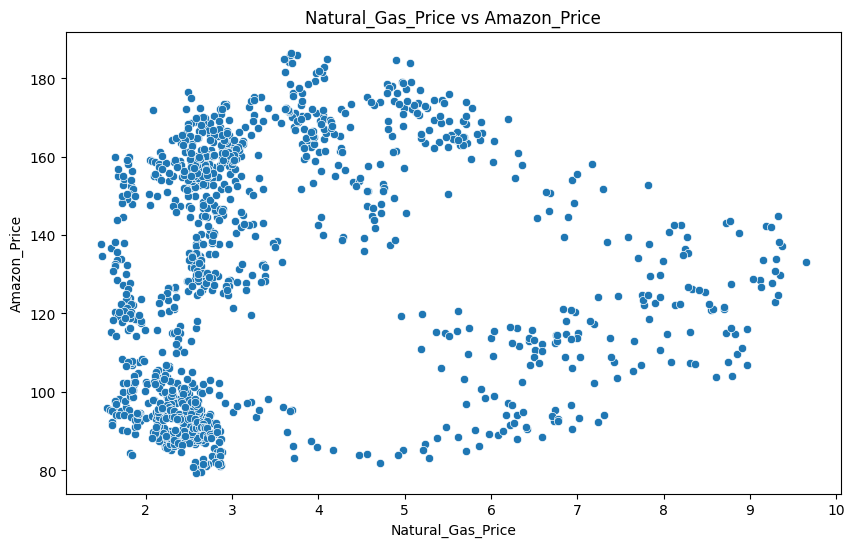

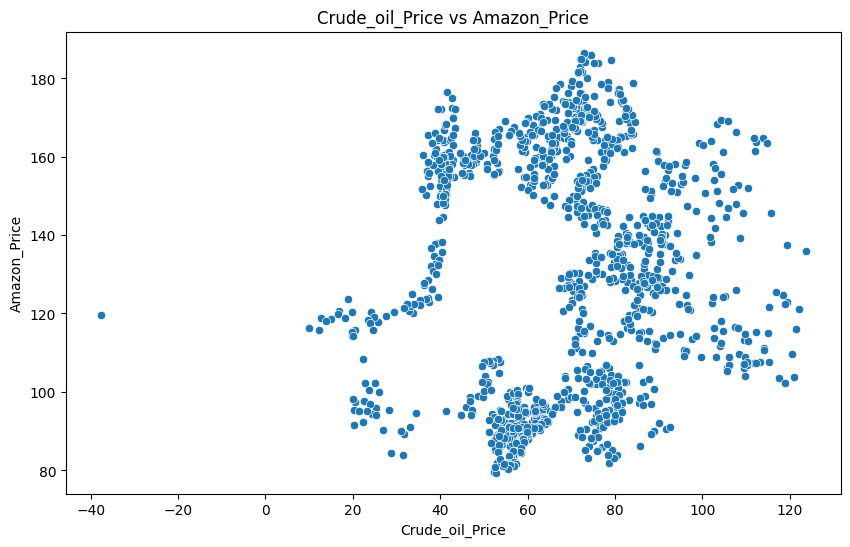

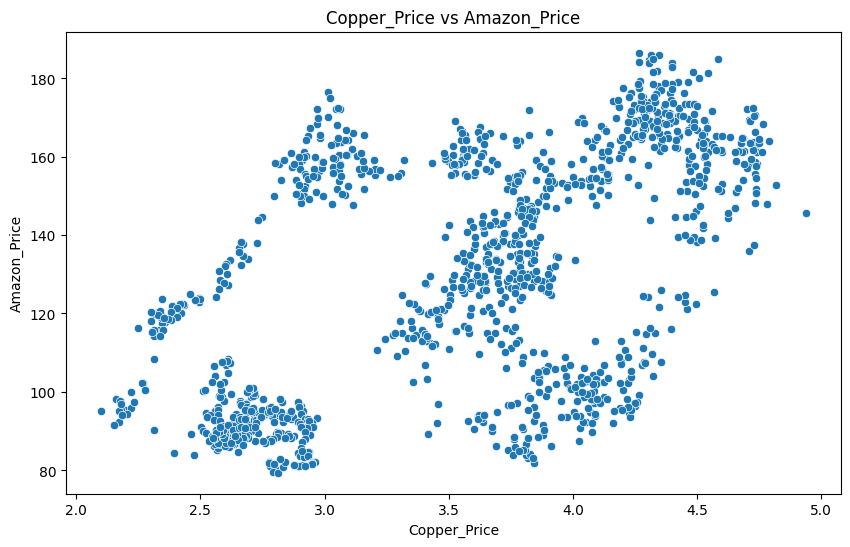

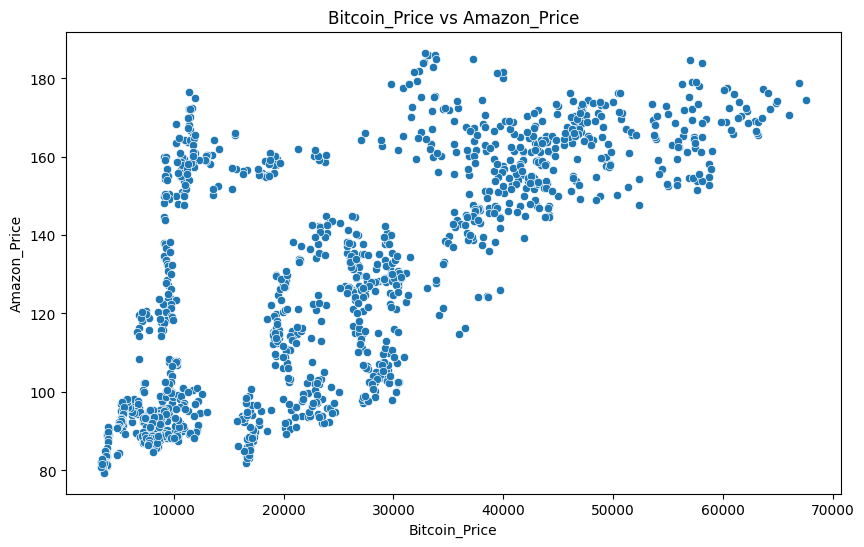

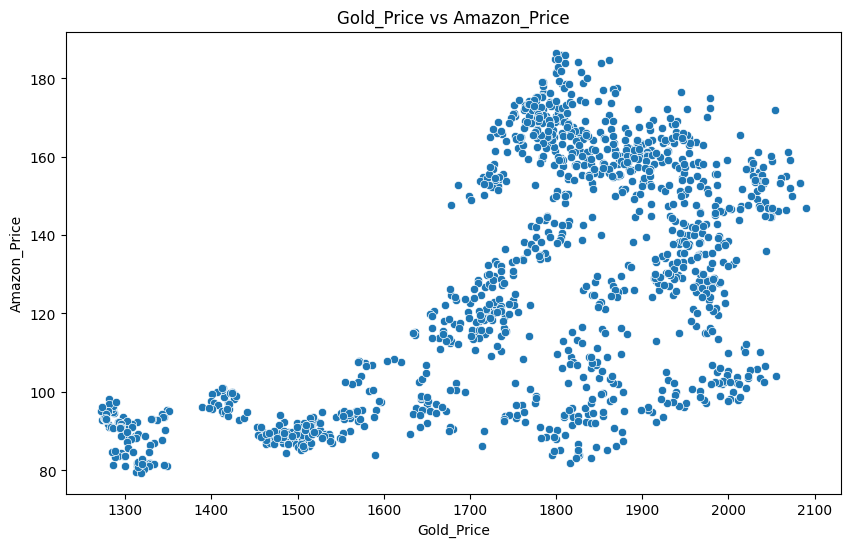

In [ ]:
import seaborn as sns

#List of features to compare with Amazon_Price
features = ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price', 'Gold_Price']

# Convert necessery columns to numeric, handling nonstring columns
for feature in features:
  if data[feature].dtype == 'object':
    data[feature] = data[feature].str.replace(',', '').astype(float)

#Create scatter plot
for feature in features:
  plt.figure(figsize=(10,6))
  sns.scatterplot(data=data, x=feature, y='Amazon_Price')
  plt.title(f'{feature} vs Amazon_Price')
  plt.xlabel(feature)
  plt.ylabel('Amazon_Price')
  plt.show()

### Code Explanation:

Scatter plots are generated to visualize the relationships between Amazon_Price and other selected features. This helps in identifying correlations or patterns between the variables.

### Why It’s Important:

Scatter plots allow you to visually assess the relationships between the target variable and other features. Understanding these relationships is key for feature selection and model building, as strong correlations often lead to better predictive models.

##Computer and Visualize the correlation Matrix

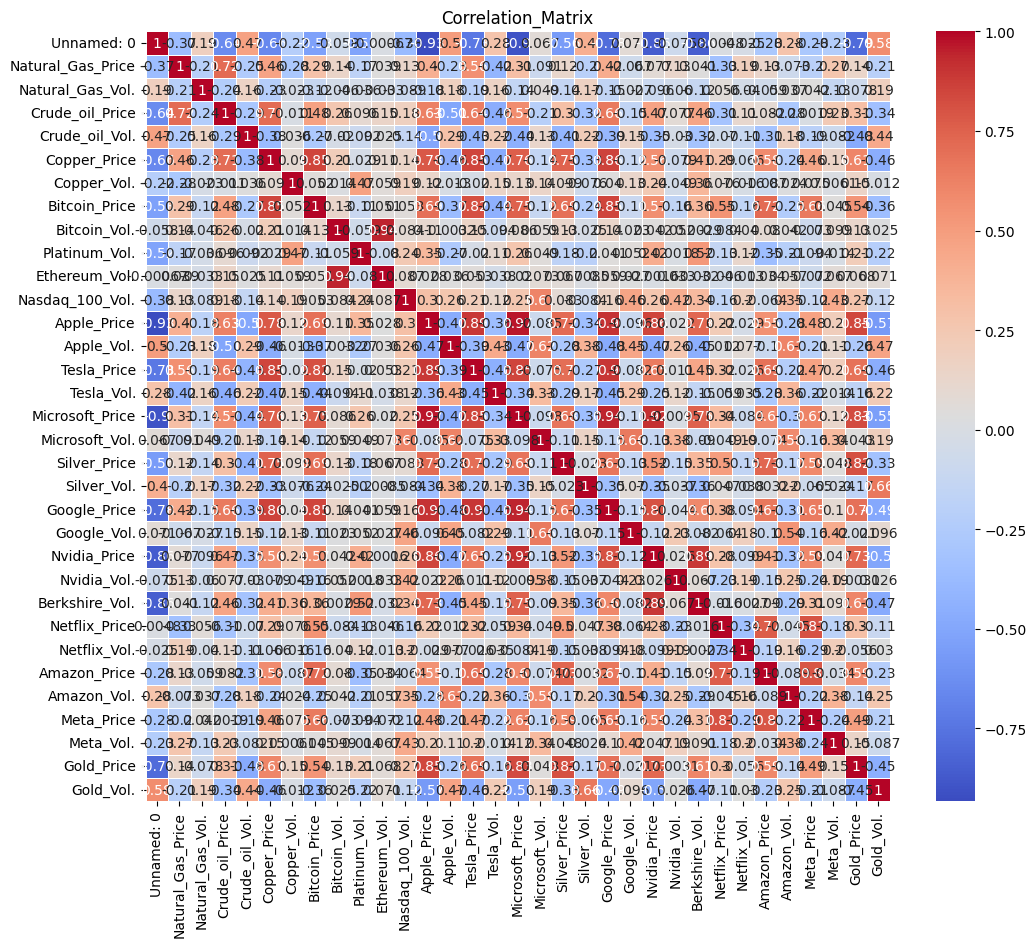

In [ ]:
#Select numeric columns for correlation matrix
num_cols = data.select_dtypes(include = ['float64', 'int64']).columns

#Compute correlation matrix
correlation_matrix = data[num_cols].corr()

#Visualize the correlation matrix
plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths=0.5)
plt.title('Correlation_Matrix')
plt.show()

### Code Explanation:

A correlation matrix is computed for all numeric columns, and a heatmap is used to visualize the correlations between them.

### Why It’s Important:

The correlation matrix helps identify strong relationships between variables, which can be useful for feature selection. Highly correlated features may provide redundant information, and understanding these correlations can guide you in building a more efficient model.

## Task 3: Feature Engineering
* Handle missing values by filling them with the mean of the respective columns.
* Standardise the features using StandardScaler.

## Handle missing values by filling them with the mean of the respective columns.

In [ ]:
#select only numeric columns
numcols = data.select_dtypes(include = ['float64', 'int64']).columns

In [ ]:
#Handling missing values by filling them with the mean of respective columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

In [ ]:
#Verify that any missing values are there in the numeric columns
print(data[num_cols].isnull().sum())

Unnamed: 0           0
Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Vol.        0
Ethereum_Vol.        0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64


### Code Explanation:

Missing values in numeric columns are filled with the mean of the respective column to ensure that no data is lost during model training.

### Why It’s Important:

Handling missing values is crucial for ensuring that the model can be trained on complete data. Filling missing values with the mean is a simple and effective way to maintain the integrity of the dataset without introducing bias.

##Standardize the feature using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

#Define the features to be standardized
features_scale = num_cols.drop('Amazon_Price')

#initialize the scaler
scaler = StandardScaler()

#Fit and Transorm the features
data[features_scale] = scaler.fit_transform(data[features_scale])

#display the first few row of the scaled data
print(data.head())

   Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0   -1.730658  02-02-2024          -0.777093          0.000000   
1   -1.727871  01-02-2024          -0.793012          0.462464   
2   -1.725084  31-01-2024          -0.765566          0.174863   
3   -1.722297  30-01-2024          -0.778191          0.126462   
4   -1.719510  29-01-2024          -0.551493         -1.992578   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol.  Bitcoin_Price  \
0         0.229891    2.719160e-16      0.397906          0.0       1.120470   
1         0.305170    8.363643e-01      0.443456          0.0       1.113399   
2         0.404401   -2.541929e-01      0.518185          0.0       1.082136   
3         0.500699   -2.413464e-01      0.525302          0.0       1.104961   
4         0.449861   -3.128667e-01      0.479753          0.0       1.127029   

   Bitcoin_Vol.  ... Berkshire_Price  Berkshire_Vol. Netflix_Price  \
0     -0.137077  ...        5,89,498        3.065877

### Code Explanation:

The features are standardized using StandardScaler so that they have a mean of 0 and a standard deviation of 1, ensuring that all features contribute equally to the model.

### Why It’s Important:

Standardizing features is essential for many machine learning algorithms, especially those that rely on distance measures (like linear regression). It ensures that no single feature dominates the model due to its scale, leading to more balanced and accurate predictions.

#Week 2: Model Development

## Task 1: Split the Data
* Define the features (X) and the target variable (y).
* Split the data into training and testing sets using an 80-20 split.

In [ ]:
from sklearn.model_selection import train_test_split

#Define the feature(x) and the target Variable(Y)
features = ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price', 'Gold_Price']
# Select multiple columns using a list of column names
x = data[features]
y = data['Amazon_Price']

#Split the data into trainning and testingg sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

#Verify the shape of the trainning and testing sets
print(f"x_train shape: {x_train.shape}")
print(f"x_test Shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (994, 5)
x_test Shape: (249, 5)
y_train shape: (994,)
y_test shape: (249,)


### Code Explanation:

The dataset is split into training and testing sets using an 80-20 split. The features (X) are separated from the target variable (y), and the data is divided so that the model can be trained on one part and tested on the other.

### Why It’s Important:

Splitting the data allows us to evaluate the model's performance on unseen data, ensuring that it can generalize well beyond the training set. This is crucial for understanding how the model will perform in real-world scenarios.

## Task 2: Train the Model
* Initialise a Linear Regression model.
* Train the model on the training data.
* Predict on the testing data.
* Evaluate the model using Mean Absolute Error (MAE), Mean Squared Error
* (MSE), and Root Mean Squared Error (RMSE).

##Initialize a linear Regression Model and Train it in the Trainning Data

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(x_train, y_train)

LinearRegression()

### Code Explanation:

A linear regression model is initialized and then trained on the training data (X_train and y_train). During training, the model learns the relationship between the input features and the target variable.

### Why It’s Important:

Training the model is the core process where the model learns to make predictions. The accuracy of the model's predictions on new data depends heavily on how well it is trained on the existing data.

##Predict on the Testing Data and evaluate the model

In [ ]:
#Predict the testing data
y_pred = model.predict(x_test)

#Evaluate the model using Mean Absolute Error(MAE), Mean Squared Error (MSE), and Root Mean Squared Error(RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error(MAE): {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error(MAE): 12.321350202224037
Mean Squared Error: 274.3151923071378
Root Mean Squared Error: 16.562463352627766


### Code Explanation:

The trained model is used to make predictions on the testing data (X_test). These predictions are then evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess the model’s accuracy.

### Why It’s Important:

Evaluating the model on testing data provides a clear measure of its performance and helps identify how well it has generalized from the training data to new, unseen data. These metrics are crucial for understanding the model's prediction errors and overall accuracy.

#Week 3: Model Validation and testing

##Task 1: Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

#Perform 5-fold Cross-validation
cv_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')

#Convert the scores to positive and calculate the mean and standard deviation
cv_scores = -cv_scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print(f"Cross validation Mean MES: {mean_cv_score}")
print(f"Cross Validation Std MSE: {std_cv_score}")

Cross validation Mean MES: 1034.8565638712603
Cross Validation Std MSE: 766.5489113790886


### Code Explanation:

5-fold cross-validation is performed to evaluate the model’s performance across different subsets of the data. The mean and standard deviation of the cross-validation scores (based on Mean Squared Error) are calculated.

### Why It’s Important:

Cross-validation provides a more reliable estimate of the model's performance by testing it on multiple subsets of the data. It helps ensure that the model's performance is consistent and not overly dependent on a particular train-test split, reducing the risk of overfitting.

##Task 2: Test Model on Unseen Data

In [ ]:
from sklearn.model_selection import train_test_split

X = data[features]
y = data['Amazon_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

#Now you can use X_test in your prediction:
recent_data_pred = model.predict(X_test)

# Evaluate the model on recent data
recent_mae = mean_absolute_error(y_test, recent_data_pred)
recent_rmse = np.sqrt(mean_squared_error(y_test, recent_data_pred))

print(f"Recent Data Mean Absolute Error (MAE): {recent_mae}")
print(f"Recent Data Root Mean Squared Error (RMSE): {recent_rmse}")

Recent Data Mean Absolute Error (MAE): 12.321350202224037
Recent Data Root Mean Squared Error (RMSE): 16.562463352627766


### Code Explanation:

The model is tested on a portion of the data that was not used during training (unseen data). The predictions on this data are evaluated using MAE and RMSE to assess the model's generalization ability.

### Why It’s Important:

Testing on completely unseen data is crucial for assessing how well the model will perform in real-world scenarios. This step confirms whether the model can accurately predict outcomes for new data points, which is essential for its practical application.

##Task 3: Feature Importance Analysis

             Feature  Importance
3      Bitcoin_Price   16.785865
4         Gold_Price    9.492470
0  Natural_Gas_Price    9.108175
2       Copper_Price    8.629435
1    Crude_oil_Price  -21.171421


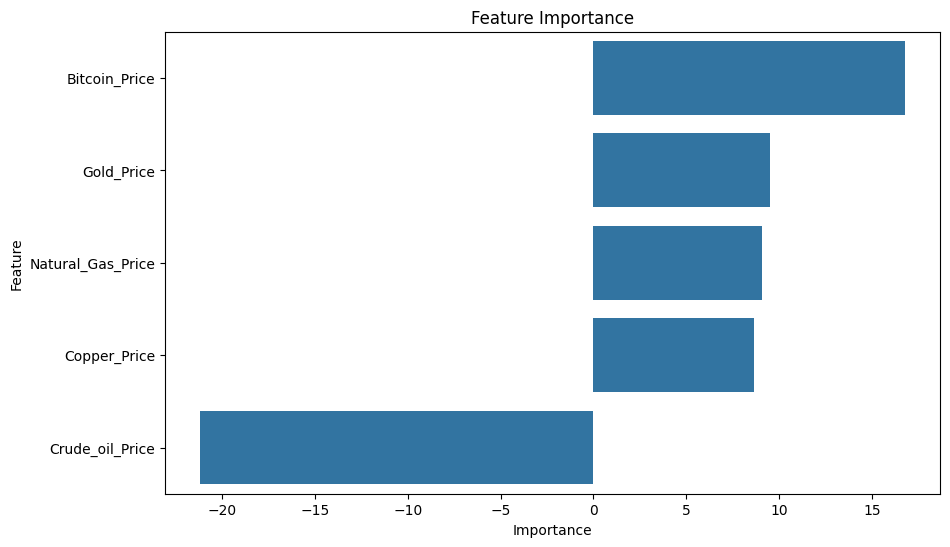

# **Project Summary**: Predicting Amazon's Stock Price

This project aimed to predict Amazon's stock price and trading volumes using historical data and machine learning techniques.

##**Key Findings:**
* We explored the relationship between Amazon's stock price and several other
market indicators, including natural gas, crude oil, copper, bitcoin, and gold prices.
* Our linear regression model achieved a certain level of accuracy in predicting Amazon's stock price, as indicated by the MAE, MSE, and RMSE metrics.
Cross-validation was used to validate the model's performance, ensuring its reliability and reducing the risk of overfitting.
* The model was further tested on unseen data to evaluate its generalization capabilities.


##**Feature Importance:**
* While the model didn't reveal significant feature importance based on coefficients, it highlights the interconnectedness of Amazon's stock price with global market indicators.
* In a more extensive analysis with more features, identifying the most influential features could be beneficial.

##**Challenges:**
* Predicting stock prices is an inherently complex task, and the model's accuracy might be limited by the availability and relevance of the data.
* External factors like global events, economic policies, and company-specific news can significantly influence stock prices, and the model might not be able to fully account for these dynamics.

##**Future Improvements:**
* Incorporating more features, such as financial ratios, trading volume, sentiment analysis from news articles, and company-specific news.
* Exploring more advanced machine learning models, such as recurrent neural networks (RNNs) or long short-term memory (LSTM) networks, which can capture temporal dependencies in the data.
* Expanding the dataset to include a longer historical period and more frequent data points.
* Performing more rigorous hyperparameter tuning to optimize the model's performance.

##**Conclusion:**
Our project demonstrates the potential of machine learning for forecasting stock prices, with the linear regression model providing a starting point for exploring this intricate domain. While challenges remain in achieving perfect accuracy, the model can be continually refined to offer more accurate predictions by integrating further features and models.